In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
#Utility Functions 

def loadData():
    return pd.read_csv("./Data/advanced_housing.csv")

def getAttr(df):
    return df.columns


In [7]:
df = loadData()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


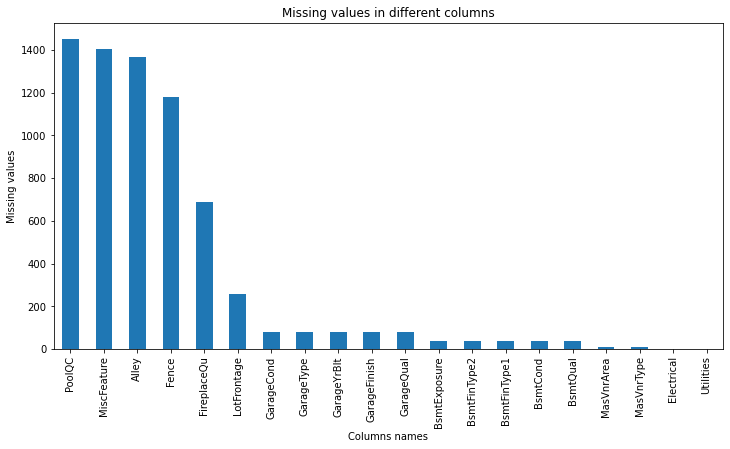

In [9]:
plt.figure(figsize=(12,6))
plt.title("Missing values in different columns")
plt.ylabel("Missing values")
plt.xlabel("Columns names")
df.isnull().sum().sort_values(ascending=False)[:20].plot(kind='bar')

In [10]:
columns=getAttr(df)
for i in columns:
    print(i, end=",  ")
print("\n\n")
print("Total attributes in the data : ",len(columns))

Id,  MSSubClass,  MSZoning,  LotFrontage,  LotArea,  Street,  Alley,  LotShape,  LandContour,  Utilities,  LotConfig,  LandSlope,  Neighborhood,  Condition1,  Condition2,  BldgType,  HouseStyle,  OverallQual,  OverallCond,  YearBuilt,  YearRemodAdd,  RoofStyle,  RoofMatl,  Exterior1st,  Exterior2nd,  MasVnrType,  MasVnrArea,  ExterQual,  ExterCond,  Foundation,  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinSF1,  BsmtFinType2,  BsmtFinSF2,  BsmtUnfSF,  TotalBsmtSF,  Heating,  HeatingQC,  CentralAir,  Electrical,  1stFlrSF,  2ndFlrSF,  LowQualFinSF,  GrLivArea,  BsmtFullBath,  BsmtHalfBath,  FullBath,  HalfBath,  BedroomAbvGr,  KitchenAbvGr,  KitchenQual,  TotRmsAbvGrd,  Functional,  Fireplaces,  FireplaceQu,  GarageType,  GarageYrBlt,  GarageFinish,  GarageCars,  GarageArea,  GarageQual,  GarageCond,  PavedDrive,  WoodDeckSF,  OpenPorchSF,  EnclosedPorch,  3SsnPorch,  ScreenPorch,  PoolArea,  PoolQC,  Fence,  MiscFeature,  MiscVal,  MoSold,  YrSold,  SaleType,  SaleConditi

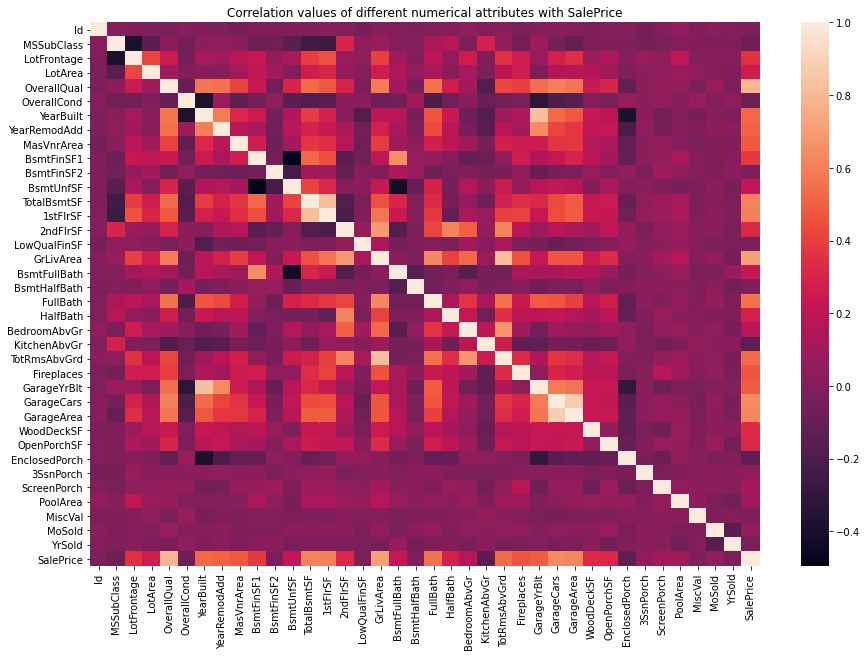

In [11]:
plt.figure(figsize=(15,10))
plt.title("Correlation values of different numerical attributes with SalePrice")
sns.heatmap(df.corr())

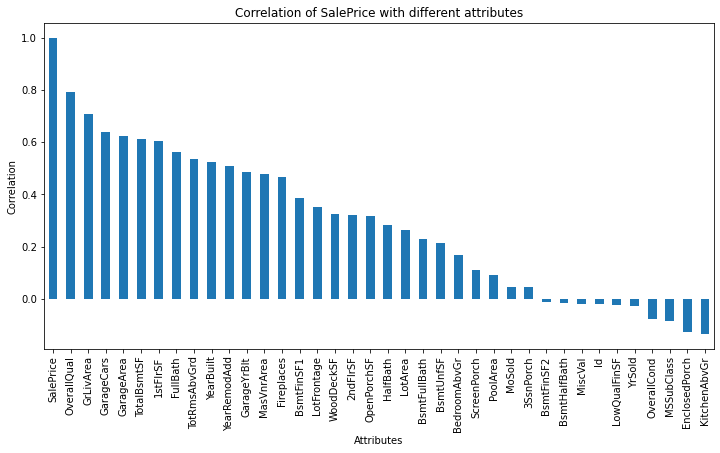

In [12]:
plt.figure(figsize=(12,6))
plt.title("Correlation of SalePrice with different attributes")
plt.xlabel('Attributes')
plt.ylabel('Correlation')
df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')

In [13]:
corr_series = df.corr()['SalePrice']
attr_tobe_drop = []
numerical_attr=[]
# Attributes having least correlation with target attribute i.e. SalePrice
for i in corr_series.sort_values(ascending=False).keys():
    if corr_series[i]<0.5:
        print(i," ==> ",corr_series[i])
        attr_tobe_drop.append(i)
    else:
        numerical_attr.append(i)

GarageYrBlt  ==>  0.48636167748786213
MasVnrArea  ==>  0.4774930470957107
Fireplaces  ==>  0.4669288367515242
BsmtFinSF1  ==>  0.38641980624215627
LotFrontage  ==>  0.35179909657067854
WoodDeckSF  ==>  0.32441344456813076
2ndFlrSF  ==>  0.31933380283206614
OpenPorchSF  ==>  0.31585622711605577
HalfBath  ==>  0.2841076755947784
LotArea  ==>  0.2638433538714063
BsmtFullBath  ==>  0.22712223313149718
BsmtUnfSF  ==>  0.214479105546969
BedroomAbvGr  ==>  0.1682131543007415
ScreenPorch  ==>  0.11144657114291048
PoolArea  ==>  0.09240354949187278
MoSold  ==>  0.04643224522381936
3SsnPorch  ==>  0.04458366533574792
BsmtFinSF2  ==>  -0.011378121450215216
BsmtHalfBath  ==>  -0.016844154297359294
MiscVal  ==>  -0.02118957964030379
Id  ==>  -0.021916719443431112
LowQualFinSF  ==>  -0.02560613000068015
YrSold  ==>  -0.028922585168730426
OverallCond  ==>  -0.0778558940486776
MSSubClass  ==>  -0.08428413512659523
EnclosedPorch  ==>  -0.12857795792595636
KitchenAbvGr  ==>  -0.1359073708421417


In [14]:
# we will drop the attributes having correlations below threshold of 0.5
# with respect to salePrice
df.drop(attr_tobe_drop, axis=1, inplace=True)

In [15]:
# Here we will drop the categorical attributes 
columns = getAttr(df)
for i in columns:
    if i not in numerical_attr:
        df.drop([i], axis=1, inplace =True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('SalePrice', axis=1).values
y=df['SalePrice'].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
# model1 with only numerical data and no dropout and early stopping
model1 = Sequential()

model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(1))
          
model1.compile(loss='mse', optimizer='adam')

In [36]:
model1.fit(x=X_train,y=y_train,epochs=300, validation_data=(X_test,y_test), batch_size=128)

Epoch 1/300
8/8 [==============================] - 0s 19ms/step - loss: 38526286734.2222 - val_loss: 38447456256.0000
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 39134911601.7778 - val_loss: 38447398912.0000
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 38699871345.7778 - val_loss: 38447345664.0000
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 38244853077.3333 - val_loss: 38447280128.0000
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 38263831210.6667 - val_loss: 38447202304.0000
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 39529617635.5556 - val_loss: 38447099904.0000
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 39964576426.6667 - val_loss: 38446972928.0000
Epoch 8/300
8/8 [==============================] - 0s 6ms/step - loss: 38064303217.7778 - val_loss: 38446792704.0000
Epoch 9/300
8/8 [==============================] - 0s 6ms/step 

8/8 [==============================] - 0s 6ms/step - loss: 37157932145.7778 - val_loss: 36620943360.0000
Epoch 71/300
8/8 [==============================] - 0s 5ms/step - loss: 37528251960.8889 - val_loss: 36517294080.0000
Epoch 72/300
8/8 [==============================] - 0s 5ms/step - loss: 37433269816.8889 - val_loss: 36410306560.0000
Epoch 73/300
8/8 [==============================] - 0s 5ms/step - loss: 37673550279.1111 - val_loss: 36298366976.0000
Epoch 74/300
8/8 [==============================] - 0s 5ms/step - loss: 37246237809.7778 - val_loss: 36182777856.0000
Epoch 75/300
8/8 [==============================] - 0s 5ms/step - loss: 37121676629.3333 - val_loss: 36063412224.0000
Epoch 76/300
8/8 [==============================] - 0s 5ms/step - loss: 37354901504.0000 - val_loss: 35938918400.0000
Epoch 77/300
8/8 [==============================] - 0s 5ms/step - loss: 35488563882.6667 - val_loss: 35810824192.0000
Epoch 78/300
8/8 [==============================] - 0s 5ms/step - los

8/8 [==============================] - 0s 5ms/step - loss: 19527720277.3333 - val_loss: 18892961792.0000
Epoch 140/300
8/8 [==============================] - 0s 5ms/step - loss: 19418089472.0000 - val_loss: 18522601472.0000
Epoch 141/300
8/8 [==============================] - 0s 5ms/step - loss: 19789265806.2222 - val_loss: 18152155136.0000
Epoch 142/300
8/8 [==============================] - 0s 5ms/step - loss: 17061402624.0000 - val_loss: 17787899904.0000
Epoch 143/300
8/8 [==============================] - 0s 5ms/step - loss: 18339140721.7778 - val_loss: 17417568256.0000
Epoch 144/300
8/8 [==============================] - 0s 5ms/step - loss: 17817503402.6667 - val_loss: 17051017216.0000
Epoch 145/300
8/8 [==============================] - 0s 5ms/step - loss: 16306631566.2222 - val_loss: 16686669824.0000
Epoch 146/300
8/8 [==============================] - 0s 5ms/step - loss: 16313725269.3333 - val_loss: 16322547712.0000
Epoch 147/300
8/8 [==============================] - 0s 5ms/st

8/8 [==============================] - 0s 5ms/step - loss: 3377968753.7778 - val_loss: 3148854016.0000
Epoch 209/300
8/8 [==============================] - 0s 5ms/step - loss: 2678520775.1111 - val_loss: 3105036544.0000
Epoch 210/300
8/8 [==============================] - 0s 5ms/step - loss: 2825080803.5556 - val_loss: 3061719040.0000
Epoch 211/300
8/8 [==============================] - 0s 5ms/step - loss: 2929942243.5556 - val_loss: 3022947840.0000
Epoch 212/300
8/8 [==============================] - 0s 5ms/step - loss: 2982489600.0000 - val_loss: 2985422848.0000
Epoch 213/300
8/8 [==============================] - 0s 5ms/step - loss: 2919012209.7778 - val_loss: 2951356928.0000
Epoch 214/300
8/8 [==============================] - 0s 5ms/step - loss: 2900910848.0000 - val_loss: 2919975424.0000
Epoch 215/300
8/8 [==============================] - 0s 5ms/step - loss: 2985451662.2222 - val_loss: 2890991616.0000
Epoch 216/300
8/8 [==============================] - 0s 5ms/step - loss: 23434

Epoch 278/300
8/8 [==============================] - 0s 5ms/step - loss: 2513557760.0000 - val_loss: 2577825536.0000
Epoch 279/300
8/8 [==============================] - 0s 5ms/step - loss: 2401172992.0000 - val_loss: 2577531136.0000
Epoch 280/300
8/8 [==============================] - 0s 5ms/step - loss: 2217062115.5556 - val_loss: 2577214464.0000
Epoch 281/300
8/8 [==============================] - 0s 5ms/step - loss: 2477083022.2222 - val_loss: 2576903424.0000
Epoch 282/300
8/8 [==============================] - 0s 5ms/step - loss: 2207500487.1111 - val_loss: 2576592384.0000
Epoch 283/300
8/8 [==============================] - 0s 5ms/step - loss: 2109575324.4444 - val_loss: 2576286208.0000
Epoch 284/300
8/8 [==============================] - 0s 5ms/step - loss: 2372426666.6667 - val_loss: 2576023040.0000
Epoch 285/300
8/8 [==============================] - 0s 5ms/step - loss: 2597542940.4444 - val_loss: 2575697152.0000
Epoch 286/300
8/8 [==============================] - 0s 5ms/step

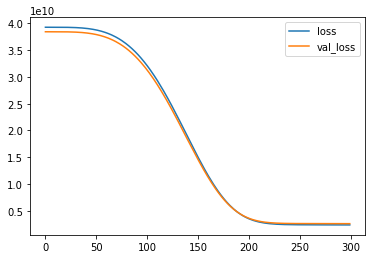

In [37]:
pd.DataFrame(model1.history.history).plot()

In [41]:
predictions  = model1.predict(X_test)

In [38]:
single_house = scaler.transform(df.drop('SalePrice', axis=1).iloc[0].values.reshape(-1,10))

In [39]:
model1.predict(single_house)

array([[217667.95]], dtype=float32)

In [40]:
df.iloc[0]['SalePrice']

208500

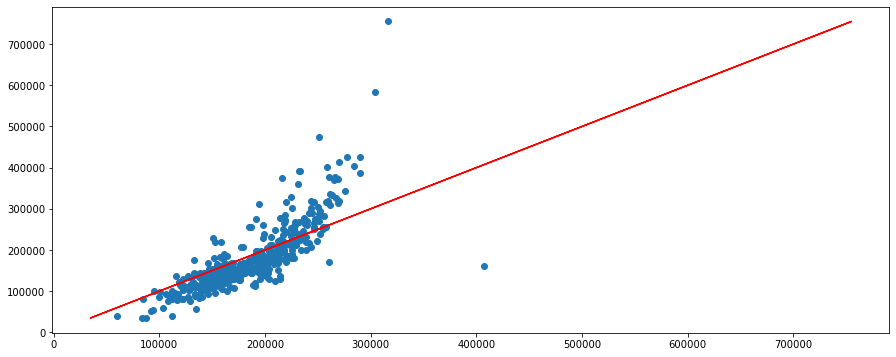

In [43]:
plt.figure(figsize=(15,6))
plt.scatter(predictions,y_test)
plt.plot(y_test,y_test,'r')